In [3]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
plt.rcParams['figure.dpi'] = 150
sns.set_style("ticks", {'axes.grid': False})

[35.  36.5 38.  39.5 41. ]
['35.0-36.5', '36.5-38.0', '38.0-39.5', '39.5-41.0']
[0 1 2 3]


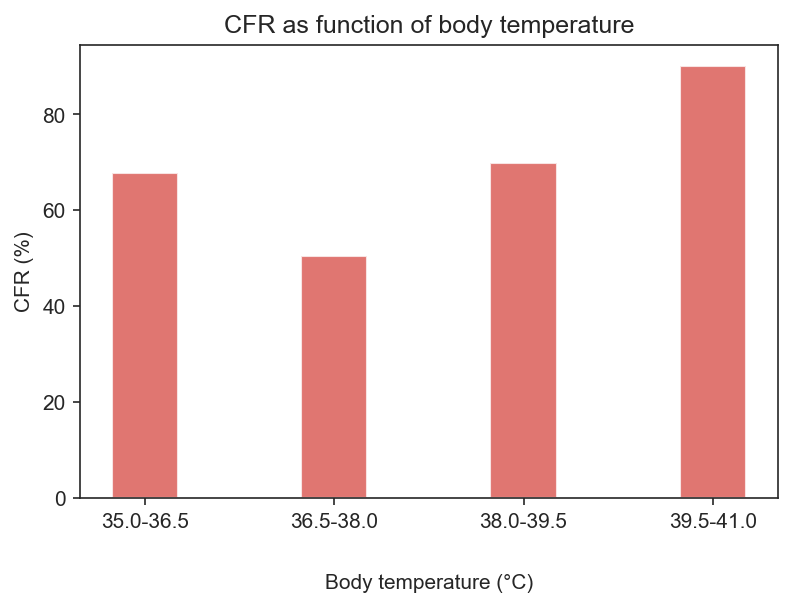

In [4]:
# This generates the "eikosogram" of mortality as function of fever temperature, each bar in the plot
# represents the conditional probability of death given that temperature is in that bin

src_data_file = '../data/data.csv'
data = pd.read_csv(src_data_file, na_values='\\N')

num_bins = 5
var = 'FeverTemperature'

mint = round(data[var].min())
maxt = round(data[var].max())

bins = np.linspace(mint, maxt, num=num_bins)
bins_names = []
for i in range(0, len(bins) - 1):
    bins_names += [str(round(bins[i],1)) + "-" + str(round(bins[i + 1],1))]

print(bins)
print(bins_names)
    
data1 = data.copy()

data1['bin'] = pd.cut(data1[var], bins, labels=False)
data1 = data1.dropna(subset=['bin'])
died_temp = data1[data1['Disposition'] == 1].groupby(['bin']).count()['Disposition']
totals_temp = data1.groupby(['bin']).count()['Disposition']

fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.8
cfr_pdw = 100 * died_temp / totals_temp
index = np.arange(len(bins) - 1)
print(index)
rects2 = plt.bar(index + bar_width/2, cfr_pdw, bar_width,
                 alpha=opacity,
                 color=sns.xkcd_rgb["pale red"],
                 label='CFR')

plt.xlabel('Body temperature (°C)', labelpad=20)
plt.ylabel('CFR (%)')
plt.title('CFR as function of body temperature')
plt.xticks(index + bar_width/2, bins_names, rotation=0)

fig.savefig('cfr_temp.pdf', bbox_inches='tight')